## Decision tree and Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
sns.set()
warnings.filterwarnings("ignore")

%matplotlib inline

### Clean and prepare data

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.drop(index=[122,123], inplace=True) # removing rows
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df.loc[:122, 'region'] = 'bejaia'
df.loc[122:, 'region'] = 'Sidi-Bel Abbes'

# make date time column
df['date'] = pd.to_datetime(df[['day','month','year']])
df.drop(['day', 'month', 'year'], axis=1, inplace=True)
df.head()

# stripping column names
df.columns = [i.strip() for i in df.columns] 

# stripping Classes feature
df.Classes = df.Classes.str.strip()

# replacing nan and null string with object
df.replace('nan', np.nan) 
df.replace('null', np.nan)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia,2012-06-04
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes,2012-09-26
240,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes,2012-09-27
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes,2012-09-28
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes,2012-09-29


In [4]:
df.loc[165,'DC'] = 14.6
df.loc[165,'ISI'] = 9
df.loc[165,'BUI'] = 12.5
df.loc[165,'FWI'] = 10.4
df.loc[165,'Classes'] = 'fire'

In [5]:
# check null value

df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
date           0
dtype: int64

In [6]:
# changing dtypes to numerical

df = df.astype({'RH':np.int64, 'Temperature':np.int64, 'Ws':np.int64, 'Rain':np.float64, 'FFMC':np.float64
               ,'DMC':np.float64, 'DC':np.float64, 'ISI':np.float64, 'BUI':np.float64,
               'FWI':np.float64})

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,bejaia,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,bejaia,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,bejaia,2012-06-05


### Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Classes'] = encoder.fit_transform(df.Classes)
df['region'] = encoder.fit_transform(df.region)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,1,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1,2012-06-05


### Handeling outliers

In [9]:
def outlier_index_zscore(data):
    z = np.abs(stats.zscore(data))
    return np.where(z > 3)

In [10]:
indexes = np.concatenate([outlier_index_zscore(df.Rain)[0], outlier_index_zscore(df.FFMC)[0] , outlier_index_zscore(df.DMC)[0], 
                          outlier_index_zscore(df.DC)[0], outlier_index_zscore(df.BUI)[0]])

In [11]:
indexes

array([  2,  91,  92,  93, 105, 139,   3,  93,  89, 207, 208, 209,  87,
        88,  89,  87,  88,  89, 207, 208, 209], dtype=int64)

In [12]:
trim_df = df.loc[set(df.index) - set(indexes)]

In [13]:
trim_df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1,2012-06-02
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1,2012-06-05
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0,1,2012-06-06
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0,1,2012-06-07


### Train Test split

In [14]:
trim_df.drop('date', axis=1, inplace=True)

In [15]:
X = trim_df.drop('Classes', axis=1) # Independet Feature
y = trim_df['Classes'] # Dependent Feature

In [17]:
from sklearn.model_selection import train_test_split
# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [18]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((154, 11), (77, 11), (154,), (77,))

### Building Model

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt_model = DecisionTreeClassifier()

In [21]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
dt_predict = dt_model.predict(x_test)

[Text(0.3333333333333333, 0.9166666666666666, 'X[7] <= 2.75\ngini = 0.497\nsamples = 154\nvalue = [83, 71]'),
 Text(0.16666666666666666, 0.75, 'gini = 0.0\nsamples = 69\nvalue = [0, 69]'),
 Text(0.5, 0.75, 'X[4] <= 80.1\ngini = 0.046\nsamples = 85\nvalue = [83, 2]'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.5833333333333334, 'X[7] <= 3.05\ngini = 0.024\nsamples = 84\nvalue = [83, 1]'),
 Text(0.5, 0.4166666666666667, 'X[4] <= 81.6\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.25, 'X[6] <= 31.65\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.4166666666666667, 'gini = 0.0\nsamples = 79\nvalue = [79, 0]')]

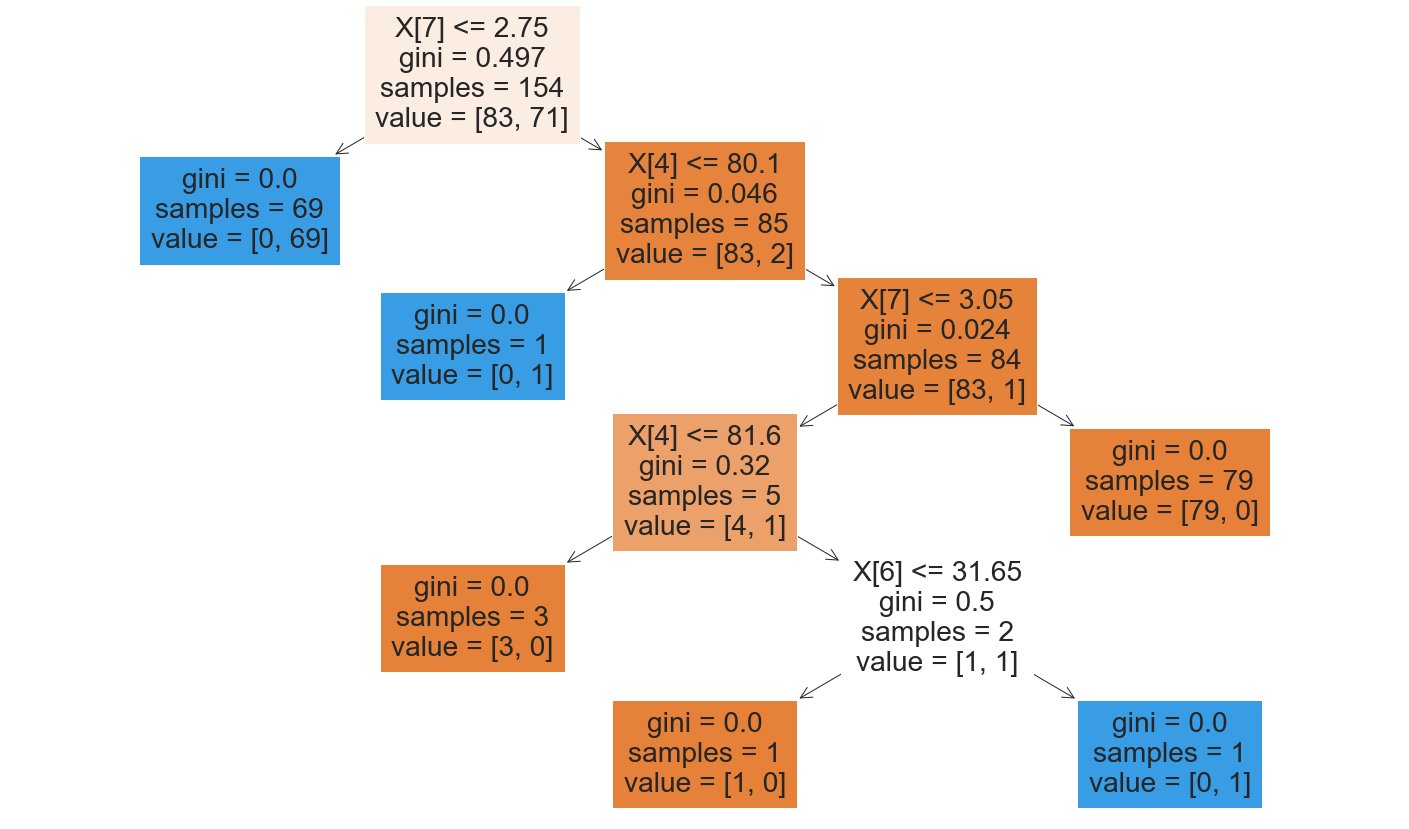

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(dt_model,filled=True)

In [26]:
dt_model.score(x_train,y_train)

1.0

In [29]:
from sklearn.metrics import precision_score, confusion_matrix, roc_auc_score, recall_score, fbeta_score, accuracy_score

In [30]:
confusion_matrix(dt_predict, y_test)

array([[46,  0],
       [ 3, 28]], dtype=int64)

In [31]:
print("precision score ------> ", precision_score(dt_predict, y_test))
print("recall score ----------> ", recall_score(dt_predict, y_test))
print("f beta score ------------> ", fbeta_score(dt_predict, y_test, beta=1))

precision score ------>  1.0
recall score ---------->  0.9032258064516129
f beta score ------------>  0.9491525423728813


### Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_model = RandomForestClassifier()

In [34]:
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
rf_predict = rf_model.predict(x_test)

In [36]:
confusion_matrix(rf_predict, y_test)

array([[47,  0],
       [ 2, 28]], dtype=int64)

In [37]:
print("precision score ------> ", precision_score(rf_predict, y_test))
print("recall score ----------> ", recall_score(rf_predict, y_test))
print("f beta score ------------> ", fbeta_score(rf_predict, y_test, beta=1))

precision score ------>  1.0
recall score ---------->  0.9333333333333333
f beta score ------------>  0.9655172413793104


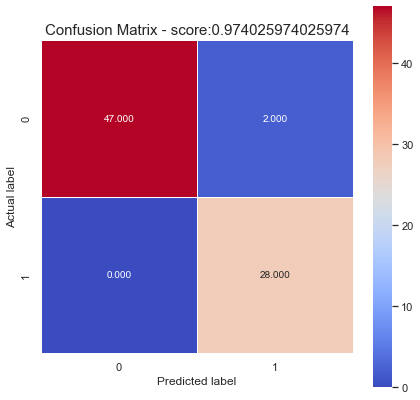

In [43]:
# Performance metrics after hyperparameter Tuning

cm = confusion_matrix(y_test, rf_predict)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "coolwarm");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,rf_predict))
plt.title(all_sample_title, size = 15);
plt.show()

In [41]:
# Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test, rf_predict, target_names=['Fire', 'Not Fire']))

              precision    recall  f1-score   support

        Fire       1.00      0.96      0.98        49
    Not Fire       0.93      1.00      0.97        28

    accuracy                           0.97        77
   macro avg       0.97      0.98      0.97        77
weighted avg       0.98      0.97      0.97        77

